In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"D:/Downloads/sms.tsv", sep='\t', header=None, names=['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isnull().sum()

label      0
message    0
dtype: int64

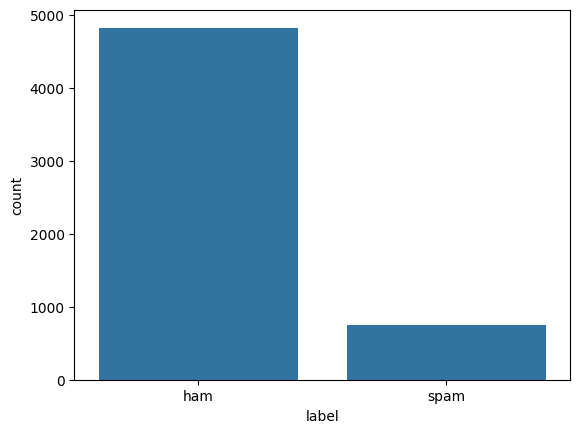

In [8]:
import seaborn as sns
sns.countplot(data=df, x='label')
plt.show()

([<matplotlib.patches.Wedge at 0x1ae696a5330>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')])

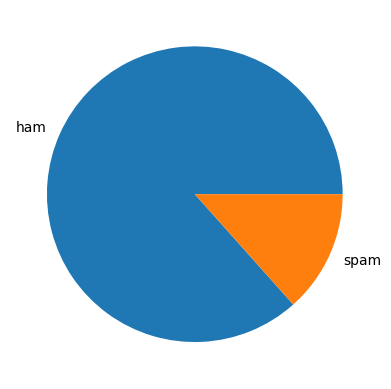

In [10]:
plt.pie(df['label'].value_counts(), labels=['ham','spam'])

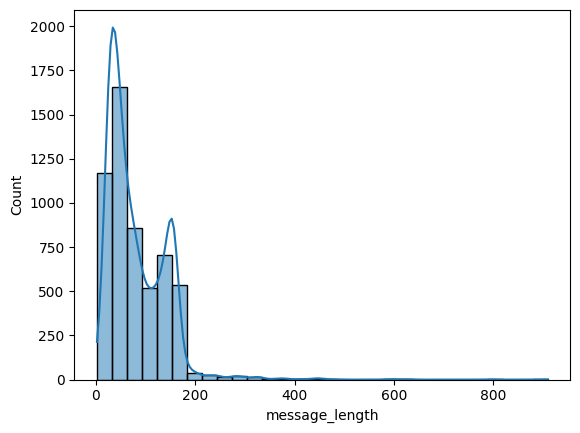

In [11]:
df['message_length']=df['message'].apply(len)
sns.histplot(df['message_length'],bins=30, kde=True)
plt.show()

In [15]:
ham_words=' '.join(df[df['label']=='ham']['message'])
spam_words=' '.join(df[df['label']=='spam']['message'])
from nltk.tokenize import word_tokenize
ham_tokens=word_tokenize(ham_words.lower())
spam_token=word_tokenize(spam_words.lower())


In [19]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)
ham_tokens = [word for word in ham_tokens if word not in stop_words and word.isalpha()]
spam_tokens = [word for word in spam_token if word not in stop_words and word.isalpha()]


In [21]:
from nltk.probability import FreqDist
ham_freq = FreqDist(ham_tokens)
spam_freq = FreqDist(spam_tokens)

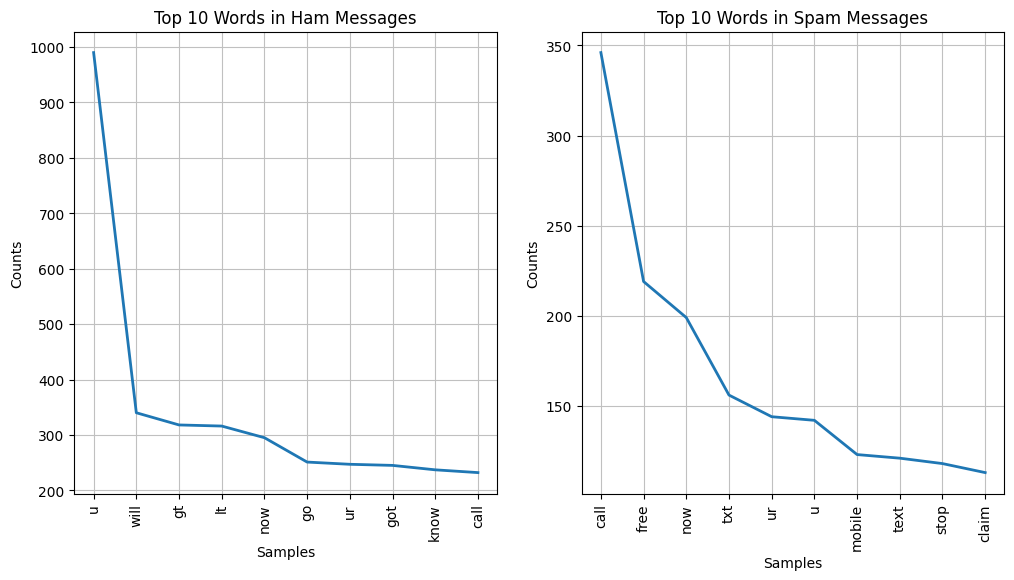

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ham_freq.plot(10, title="Top 10 Words in Ham Messages")
plt.subplot(1, 2, 2)
spam_freq.plot(10, title="Top 10 Words in Spam Messages")
plt.show()


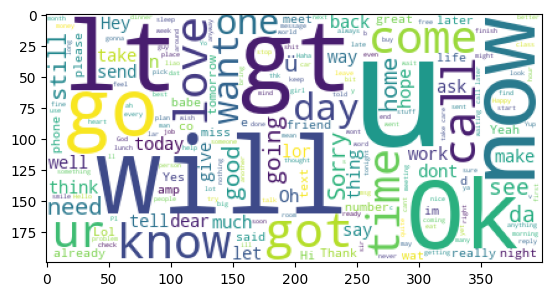

In [24]:
ham_wordcloud=WordCloud(stopwords=stop_words, background_color='white').generate(ham_words)
plt.imshow(ham_wordcloud)

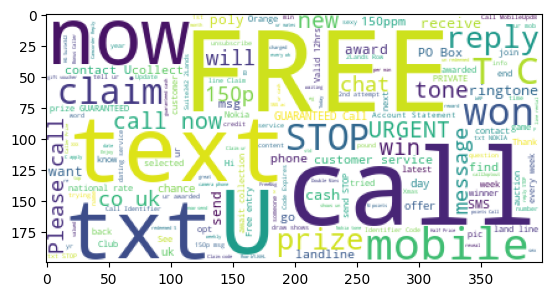

In [25]:
spam_wordcloud=WordCloud(stopwords=stop_words, background_color='white').generate(spam_words)
plt.imshow(spam_wordcloud)

E:\Xai_Req_Setup\Python3109\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Xai_Req_Setup\Python3109\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Xai_Req_Setup\Python3109\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Xai_Req_Setup\Python3109\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Xai_Req_Setup\Python3109\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Xai_Req_Setup\Python3109\lib\site-packages\IPython\core\pylabtools.py:170: Us

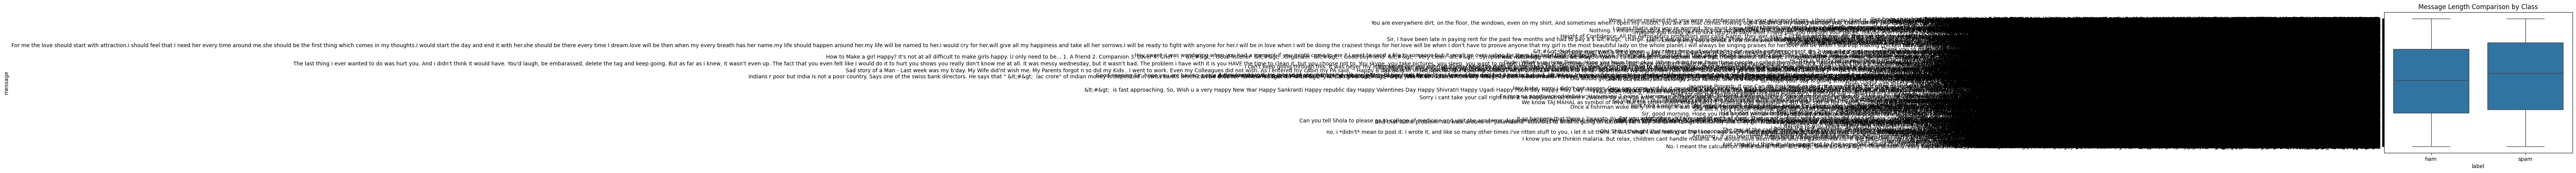

In [27]:
import seaborn as sns
sns.boxplot(data=df, x='label', y='message')
plt.title("Message Length Comparison by Class")
plt.show()